In [29]:
import pandas as pd

In [30]:
# input data
loan_data = pd.read_csv("data/loan_data.csv")
loan_data["INPUT:decision_1"] = [1 if val == "**High**" else 0 for val in loan_data["INPUT:decision_1"]]
loan_data["INPUT:decision_2"] = [1 if val == "**High**" else 0 for val in loan_data["INPUT:decision_2"]]

recid_data = pd.read_csv("data/recidivism_data.csv")
recid_data["decision_1"] = [1 if val == "**High**" else 0 for val in recid_data["decision_1"]]
recid_data["decision_2"] = [1 if val == "**High**" else 0 for val in recid_data["decision_2"]]

# results
## loan data
loan_exp_1 = pd.read_excel("attention checked results/loan experimental batch 1.xlsx")
loan_exp_2 = pd.read_excel("attention checked results/loan experimental batch 2.xlsx")

# loan_exp_1 = pd.read_csv("toloka_results/loan experimental batch 1.tsv", delimiter="\t")
# loan_exp_2 = pd.read_csv("toloka_results/loan experimental batch 1.tsv", delimiter="\t")
loan_exp = pd.concat([loan_exp_1, loan_exp_2])

loan_ctrl_1 = pd.read_excel("attention checked results/loan control batch 1.xlsx")
loan_ctrl_2 = pd.read_excel("attention checked results/loan control batch 2.xlsx")

# loan_ctrl_1 = pd.read_csv("toloka_results/loan control batch 1.tsv", delimiter="\t")
# loan_ctrl_2 = pd.read_csv("toloka_results/loan control batch 2.tsv", delimiter="\t")
loan_ctrl = pd.concat([loan_ctrl_1, loan_ctrl_2])

## recid data
recid_exp_1 = pd.read_excel("attention checked results/recidivism experimental batch 1.xlsx")
recid_exp_2 = pd.read_excel("attention checked results/recidivism experimental batch 2.xlsx")

# recid_exp_1 = pd.read_csv("toloka_results/recidivism experimental batch 1.tsv", delimiter="\t")
# recid_exp_2 = pd.read_csv("toloka_results/recidivism experimental batch 2.tsv", delimiter="\t")
recid_exp = pd.concat([recid_exp_1, recid_exp_2])

recid_ctrl_1 = pd.read_excel("attention checked results/recidivism control batch 1.xlsx")
recid_ctrl_2 = pd.read_excel("attention checked results/recidivism control batch 2.xlsx")

# recid_ctrl_1 = pd.read_csv("toloka_results/recidivism control batch 1.tsv", delimiter="\t")
# recid_ctrl_2 = pd.read_csv("toloka_results/recidivism control batch 2.tsv", delimiter="\t")
recid_ctrl = pd.concat([recid_ctrl_1, recid_ctrl_2])


In [31]:
print(len(loan_exp["ASSIGNMENT:worker_id"].unique()))
print(len(recid_exp["ASSIGNMENT:worker_id"].unique()))
print(len(loan_ctrl["ASSIGNMENT:worker_id"].unique()))
print(len(recid_ctrl["ASSIGNMENT:worker_id"].unique()))

58
63
44
62


In [32]:
print(len(loan_exp))
print(len(recid_exp))
print(len(loan_ctrl))
print(len(recid_ctrl))

71
65
57
67


In [33]:
def convert_to_num(df, column_name):
    col = []
    for _, row in df.iterrows():
        if(type(row[column_name]) == str):
            val = float(row[column_name][1])
        else:
            val = row[column_name]
        col.append(val)      

    df[column_name] = col

In [34]:
for df in [recid_exp, loan_exp]:
    for col_name in ["OUTPUT:answer1", "OUTPUT:answer2", "OUTPUT:confidence1", "OUTPUT:confidence2"]:
        convert_to_num(df, col_name)

for df in [recid_ctrl, loan_ctrl]:
    for col_name in ["OUTPUT:answer1", "OUTPUT:confidence1"]:
        convert_to_num(df, col_name)

In [35]:
is_recid = []
ai_dec = []

for _, row in recid_exp.iterrows():
    name = row["INPUT:name"]
    sel_row = recid_data[recid_data["name"]==name.lower()]
    if(sel_row["profile_1"].iloc[0]=="AI"):
        ai_dec.append(sel_row["decision_1"].iloc[0])
    else:
        ai_dec.append(sel_row["decision_2"].iloc[0])
    is_recid.append(float(sel_row["is_recid"]))

recid_exp["ground_truth"] = is_recid
recid_exp["ai_dec"] = ai_dec
recid_exp["agreement1"] = [float(row["OUTPUT:answer1"] == row["ai_dec"]) for _, row in recid_exp.iterrows()] # whether cw agrees with AI before profile reveal
recid_exp["agreement2"] = [float(row["OUTPUT:answer2"] == row["ai_dec"]) for _, row in recid_exp.iterrows()] # whether cw agrees with AI after profile reveal
recid_exp["cw_acc1"] = [float(row["OUTPUT:answer1"] == row["ground_truth"]) for _, row in recid_exp.iterrows()] # crowd worker acc for decision before profile reveal
recid_exp["cw_acc2"] = [float(row["OUTPUT:answer2"] == row["ground_truth"]) for _, row in recid_exp.iterrows()] # crowd worker acc for decision before profile reveal
recid_exp_results = recid_exp[["ASSIGNMENT:worker_id", "INPUT:name", "OUTPUT:answer1", "OUTPUT:confidence1", "OUTPUT:excerpt1", "OUTPUT:answer2", "OUTPUT:confidence2", "OUTPUT:excerpt2", "ai_dec", "agreement1", "agreement2", "cw_acc1", "cw_acc2", "ground_truth"]]
recid_exp_results.to_csv("toloka_results/recid_exp_results.csv", index=False)

In [36]:
is_recid = []
ai_dec = []

for _, row in recid_ctrl.iterrows():
    name = row["INPUT:name"]
    sel_row = recid_data[recid_data["name"]==name.lower()]
    if(sel_row["profile_1"].iloc[0]=="AI"):
        ai_dec.append(sel_row["decision_1"].iloc[0])
    else:
        ai_dec.append(sel_row["decision_2"].iloc[0])
    is_recid.append(float(sel_row["is_recid"]))

recid_ctrl["ground_truth"] = is_recid
recid_ctrl["ai_dec"] = ai_dec
recid_ctrl["agreement1"] = [float(row["OUTPUT:answer1"] == row["ai_dec"]) for _, row in recid_ctrl.iterrows()] # whether cw agrees with AI
recid_ctrl["cw_acc1"] = [float(row["OUTPUT:answer1"] == row["ground_truth"]) for _, row in recid_ctrl.iterrows()] # crowd worker acc for decision before profile reveal
recid_ctrl_results = recid_ctrl[["ASSIGNMENT:worker_id","INPUT:name", "OUTPUT:answer1", "OUTPUT:confidence1", "OUTPUT:excerpt1", "ai_dec", "agreement1", "cw_acc1","ground_truth"]]
recid_ctrl_results.to_csv("toloka_results/recid_ctrl_results.csv", index=False)

In [37]:
loan_paid = []
ai_dec = []

for _, row in loan_exp.iterrows():
    emp_title = row["INPUT:emp_title"]
    sel_row = loan_data[loan_data["INPUT:emp_title"]==emp_title]
    if(sel_row["INPUT:profile_1"].iloc[0]=="AI"):
        ai_dec.append(sel_row["INPUT:decision_1"].iloc[0])
    else:
        ai_dec.append(sel_row["INPUT:decision_2"].iloc[0])
    loan_paid.append(float(sel_row["loan_paid"]))

loan_exp["ground_truth"] = loan_paid
loan_exp["ai_dec"] = ai_dec
loan_exp["agreement1"] = [float(row["OUTPUT:answer1"] == row["ai_dec"]) for _, row in loan_exp.iterrows()] # whether cw agrees with AI before profile reveal
loan_exp["agreement2"] = [float(row["OUTPUT:answer2"] == row["ai_dec"]) for _, row in loan_exp.iterrows()] # whether cw agrees with AI after profile reveal
loan_exp["cw_acc1"] = [float(row["OUTPUT:answer1"] == row["ground_truth"]) for _, row in loan_exp.iterrows()] # crowd worker acc for decision before profile reveal
loan_exp["cw_acc2"] = [float(row["OUTPUT:answer2"] == row["ground_truth"]) for _, row in loan_exp.iterrows()] # crowd worker acc for decision after profile reveal
loan_exp_results = loan_exp[["ASSIGNMENT:worker_id","INPUT:emp_title", "OUTPUT:answer1", "OUTPUT:confidence1", "OUTPUT:excerpt1", "OUTPUT:answer2", "OUTPUT:confidence2", "OUTPUT:excerpt2", "ai_dec", "agreement1", "agreement2", "cw_acc1", "cw_acc2", "ground_truth"]]
loan_exp_results.to_csv("toloka_results/loan_exp_results.csv", index=False)

In [38]:
loan_paid = []
ai_dec = []

for _, row in loan_ctrl.iterrows():
    emp_title = row["INPUT:emp_title"]
    sel_row = loan_data[loan_data["INPUT:emp_title"]==emp_title]
    if(sel_row["INPUT:profile_1"].iloc[0]=="AI"):
        ai_dec.append(sel_row["INPUT:decision_1"].iloc[0])
    else:
        ai_dec.append(sel_row["INPUT:decision_2"].iloc[0])
    loan_paid.append(float(sel_row["loan_paid"]))

loan_ctrl["ground_truth"] = loan_paid
loan_ctrl["ai_dec"] = ai_dec
loan_ctrl["agreement1"] = [float(row["OUTPUT:answer1"] == row["ai_dec"]) for _, row in loan_ctrl.iterrows()] # whether cw agrees with AI
loan_ctrl["cw_acc1"] = [float(row["OUTPUT:answer1"] == row["ground_truth"]) for _, row in loan_ctrl.iterrows()] # crowd worker acc for decision before profile reveal
loan_ctrl_results = loan_ctrl[["ASSIGNMENT:worker_id","INPUT:emp_title", "OUTPUT:answer1", "OUTPUT:confidence1", "OUTPUT:excerpt1", "ai_dec", "agreement1", "cw_acc1" ,"ground_truth"]]
loan_ctrl_results.to_csv("toloka_results/loan_ctrl_results.csv", index=False)

In [39]:
def exp_agg_results(df, file_name, primary_key, context):
    df_exp = pd.DataFrame(df.groupby(primary_key, as_index=False).mean())
    df_exp["OUTPUT:answer1"] = [int(val > 0.5) for val in df_exp["OUTPUT:answer1"]] # majority voting 
    df_exp["OUTPUT:answer2"] = [int(val > 0.5) for val in df_exp["OUTPUT:answer2"]] # majority voting
    df_exp["context"] = [context]*len(df_exp)
    
    df_exp = df_exp.rename(columns={primary_key: "primary_key"})
    df_exp.to_csv(file_name, index=False)
    return df_exp

def ctrl_agg_results(df, file_name, primary_key, context):
    df_ctrl = pd.DataFrame(df.groupby(primary_key, as_index=False).mean())
    df_ctrl["OUTPUT:answer1"] = [int(val > 0.5) for val in df_ctrl["OUTPUT:answer1"]] # majority voting
    df_ctrl["cw_acc1"] = [float(row["OUTPUT:answer1"] == row["ground_truth"]) for _, row in df_ctrl.iterrows()] # crowd worker acc for decision
    df_ctrl = df_ctrl.rename(columns={primary_key: "primary_key"})
    df_ctrl["context"] = [context]*len(df_ctrl)
    df_ctrl.to_csv(file_name, index=False)
    return df_ctrl

In [40]:
# aggregate per user

agg_recid_exp = exp_agg_results(recid_exp_results, "toloka_results/agg_recid_exp_results.csv", "ASSIGNMENT:worker_id", "recid")
agg_loan_exp = exp_agg_results(loan_exp_results, "toloka_results/agg_loan_exp_results.csv", "ASSIGNMENT:worker_id", "loan")
agg_exp = pd.concat([agg_recid_exp, agg_loan_exp])

agg_recid_ctrl = ctrl_agg_results(recid_ctrl_results, "toloka_results/agg_recid_ctrl_results.csv", "ASSIGNMENT:worker_id", "recid")
agg_loan_ctrl = ctrl_agg_results(loan_ctrl_results, "toloka_results/agg_loan_ctrl_results.csv", "ASSIGNMENT:worker_id", "loan")
agg_ctrl = pd.concat([agg_recid_ctrl, agg_loan_ctrl])

In [41]:
from scipy import stats

# context wise analysis

print("Recid exp v/s Loan exp:")
print("Decision accuracy:")
print(stats.ttest_ind(agg_recid_exp["cw_acc2"], agg_loan_exp["cw_acc2"]))
print(stats.ttest_ind(agg_recid_exp["cw_acc1"], agg_loan_exp["cw_acc1"]))
print("Decision Confidence: ")
print(stats.ttest_ind(agg_recid_exp["OUTPUT:confidence1"], agg_loan_exp["OUTPUT:confidence1"]))
print(stats.ttest_ind(agg_recid_exp["OUTPUT:confidence2"], agg_loan_exp["OUTPUT:confidence2"], nan_policy="omit"))
print("Agreement Fraction:")
print(stats.ttest_ind(agg_recid_exp["agreement2"], agg_loan_exp["agreement2"]))
print(stats.ttest_ind(agg_recid_exp["agreement1"], agg_loan_exp["agreement1"]))

print("\nRecid ctrl v/s Loan ctrl:")
print("Decision accuracy:")
print(stats.ttest_ind(agg_recid_ctrl["cw_acc1"], agg_loan_ctrl["cw_acc1"]))
print("Decision Confidence: ")
print(stats.ttest_ind(agg_recid_ctrl["OUTPUT:confidence1"], agg_loan_ctrl["OUTPUT:confidence1"]))
print("Agreement Fraction:")
print(stats.ttest_ind(agg_recid_ctrl["agreement1"], agg_loan_ctrl["agreement1"]))

Recid exp v/s Loan exp:
Decision accuracy:
Ttest_indResult(statistic=-0.24201656080015413, pvalue=0.809183911174742)
Ttest_indResult(statistic=-0.2563782834544884, pvalue=0.7981014497482877)
Decision Confidence: 
Ttest_indResult(statistic=1.4059473927368762, pvalue=0.16234546635519517)
Ttest_indResult(statistic=1.9991423353416415, pvalue=0.04797192340450797)
Agreement Fraction:
Ttest_indResult(statistic=-0.5051606525671973, pvalue=0.614380304346323)
Ttest_indResult(statistic=-1.2765695732011666, pvalue=0.20423985110797005)

Recid ctrl v/s Loan ctrl:
Decision accuracy:
Ttest_indResult(statistic=1.345399928337443, pvalue=0.18142224629028206)
Decision Confidence: 
Ttest_indResult(statistic=1.4282151924237685, pvalue=0.1562261775933559)
Agreement Fraction:
Ttest_indResult(statistic=-0.1378003873184224, pvalue=0.890664623414259)


<Figure size 432x288 with 0 Axes>

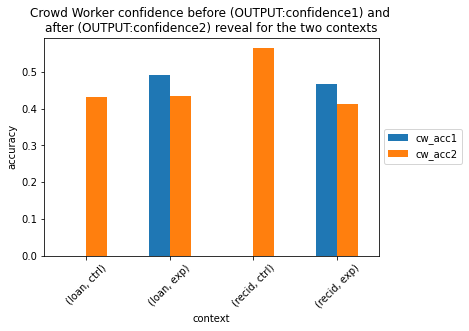

In [66]:
temp = agg_ctrl.rename(columns={"agreement1": "agreement2", "OUTPUT:confidence1":"OUTPUT:confidence2", "cw_acc1":"cw_acc2"})
temp["scenario"] = ["ctrl"]*len(temp)
agg_exp["scenario"] = ["exp"]*len(agg_exp)
df = pd.concat([agg_exp, temp])

import matplotlib.pyplot as plt

plt.figure()
ax = df.groupby(["context", "scenario"])[["cw_acc1", "cw_acc2"]].mean().plot(kind="bar", rot=45)
plt.title("Crowd Worker confidence before (OUTPUT:confidence1) and \nafter (OUTPUT:confidence2) reveal for the two contexts")
plt.xlabel("context")
plt.ylabel("accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 432x288 with 0 Axes>

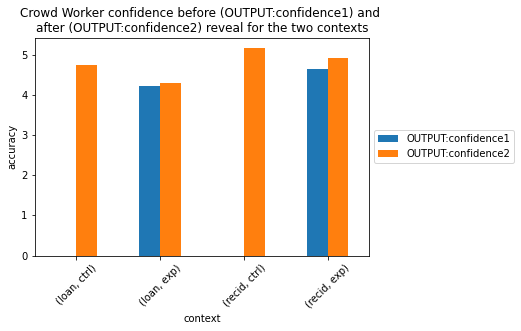

In [67]:
plt.figure()
ax = df.groupby(["context", "scenario"])[["OUTPUT:confidence1", "OUTPUT:confidence2"]].mean().plot(kind="bar", rot=45)
plt.title("Crowd Worker confidence before (OUTPUT:confidence1) and \nafter (OUTPUT:confidence2) reveal for the two contexts")
plt.xlabel("context")
plt.ylabel("accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<Figure size 432x288 with 0 Axes>

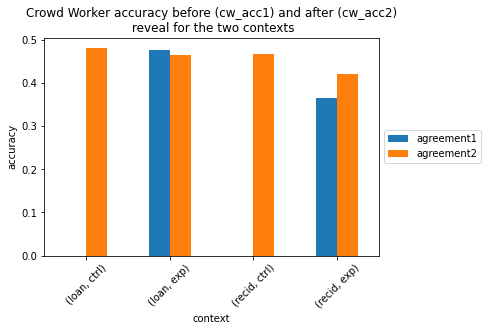

In [68]:
plt.figure()
ax = df.groupby(["context", "scenario"])[["agreement1", "agreement2"]].mean().plot(kind="bar", rot=45)
plt.title("Crowd Worker accuracy before (cw_acc1) and after (cw_acc2)\n reveal for the two contexts")
plt.xlabel("context")
plt.ylabel("accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [72]:
# Hypothesis 1: Experiment v/s Ctrl (independent two tailed t-test)
print("Exp(after) v/s Ctrl:")
print("Decision accuracy:")
print(stats.ttest_ind(agg_exp["cw_acc2"], agg_ctrl["cw_acc1"], nan_policy="omit"))
print("Decision Confidence: ")
print(stats.ttest_ind(agg_exp["OUTPUT:confidence2"], agg_ctrl["OUTPUT:confidence1"], nan_policy="omit"))
print("Agreement Fraction:")
print(stats.ttest_ind(agg_exp["agreement2"], agg_ctrl["agreement1"], nan_policy="omit"))

Exp(after) v/s Ctrl:
Decision accuracy:
Ttest_indResult(statistic=-1.327001801548999, pvalue=0.1858531522007497)
Decision Confidence: 
Ttest_indResult(statistic=-1.6668706282843453, pvalue=0.0969630901211483)
Agreement Fraction:
Ttest_indResult(statistic=-0.48003191684217206, pvalue=0.6316710277960268)


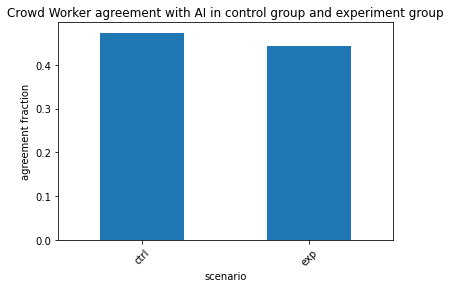

In [61]:
ax = df.groupby("scenario")["agreement2"].mean().plot(kind="bar", rot=45)
plt.title("Crowd Worker agreement with AI in control group and experiment group")
plt.xlabel("Task scenario")
plt.ylabel("Agreement Fraction")
plt.show()

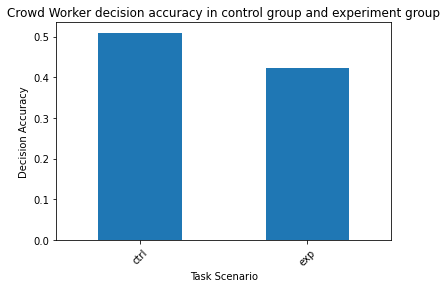

In [62]:
ax = df.groupby("scenario")["cw_acc2"].mean().plot(kind="bar", rot=45)
plt.title("Crowd Worker decision accuracy in control group and experiment group")
plt.xlabel("Task Scenario")
plt.ylabel("Decision Accuracy")
plt.show()

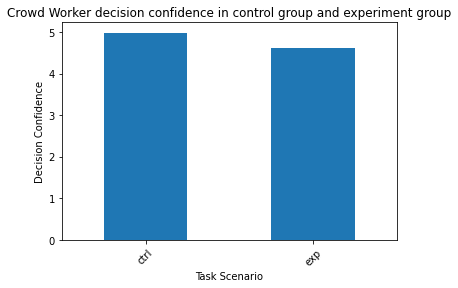

In [82]:
ax = df.groupby("scenario")["OUTPUT:confidence2"].mean().plot(kind="bar", rot=45)
plt.title("Crowd Worker decision confidence in control group and experiment group")
plt.xlabel("Task Scenario")
plt.ylabel("Decision Confidence")
plt.show()

In [71]:
# Hypothesis 2: Initial v/s Final decision (dependent two tailed t-test)

print("Exp(after) v/s Exp(before):")
print("Decision accuracy:")
print(stats.ttest_rel(agg_exp["cw_acc2"], agg_exp["cw_acc1"], nan_policy="omit"))
print("Decision Confidence: ")
print(stats.ttest_rel(agg_exp["OUTPUT:confidence2"], agg_exp["OUTPUT:confidence1"], nan_policy="omit"))
print("Agreement Fraction: ")
print(stats.ttest_rel(agg_exp["agreement2"], agg_exp["agreement1"], nan_policy="omit"))

Exp(after) v/s Exp(before):
Decision accuracy:
TtestResult(statistic=-1.7055473153201182, pvalue=0.09067958838721474, df=120)
Decision Confidence: 
TtestResult(statistic=1.5319280001820703, pvalue=0.12828657258894763, df=115)
Agreement Fraction: 
TtestResult(statistic=0.7099683899138742, pvalue=0.479101108741547, df=120)


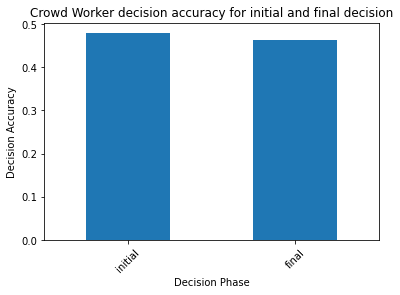

In [83]:
ax = df[["cw_acc1", "cw_acc2"]].mean().plot(kind="bar", rot=45)
plt.title("Crowd Worker decision accuracy for initial and final decision")
plt.xlabel("Decision Phase")
plt.xticks([0,1], ["initial", "final"])
plt.ylabel("Decision Accuracy")
plt.show()

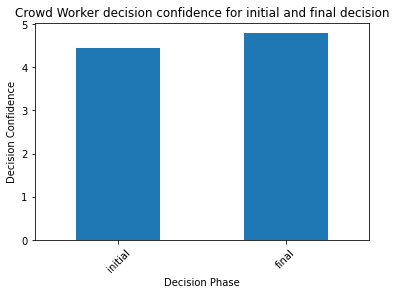

In [84]:
ax = df[["OUTPUT:confidence1", "OUTPUT:confidence2"]].mean().plot(kind="bar", rot=45)
plt.title("Crowd Worker decision confidence for initial and final decision")
plt.xlabel("Decision Phase")
plt.xticks([0,1], ["initial", "final"])
plt.ylabel("Decision Confidence")
plt.show()

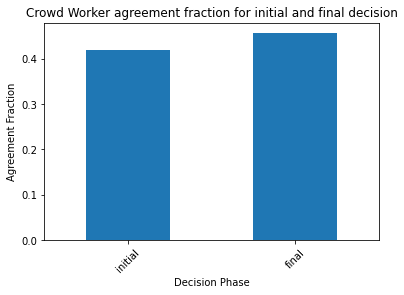

In [86]:
ax = df[["agreement1", "agreement2"]].mean().plot(kind="bar", rot=45)
plt.title("Crowd Worker agreement fraction for initial and final decision")
plt.xlabel("Decision Phase")
plt.xticks([0,1], ["initial", "final"])
plt.ylabel("Agreement Fraction")
plt.show()

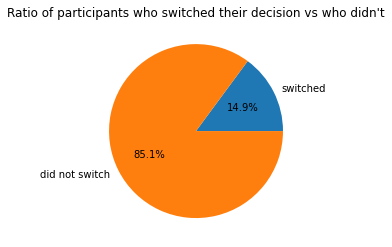

In [92]:
## switch ratio

plt.figure()
switch_ratio = len(agg_exp.loc[agg_exp["OUTPUT:answer1"]!=agg_exp["OUTPUT:answer2"]])/len(agg_exp)
non_switch_ratio = 1 - switch_ratio
plt.pie([switch_ratio, non_switch_ratio], labels=["switched", "did not switch"], autopct='%1.1f%%')
plt.title("Ratio of participants who switched their decision vs who didn't")
plt.show()

In [88]:
def switch_fractions(df):
    switch_to_AI = len(df.loc[(df["OUTPUT:answer1"] != df["ai_dec"]) & (df["OUTPUT:answer2"] == df["ai_dec"])])/len(df.loc[(df["OUTPUT:answer1"] != df["ai_dec"])])
    switch_to_human = len(df.loc[(df["OUTPUT:answer1"] == df["ai_dec"]) & (df["OUTPUT:answer2"] != df["ai_dec"])])/len(df.loc[(df["OUTPUT:answer1"] == df["ai_dec"])])

    print("Switch fraction to AI (dec1 -> human, dec2 -> AI): ", switch_to_AI)
    print("Switch fraction to Human (dec1 -> AI, dec2 -> human): ", switch_to_human)


switch_fractions(agg_exp)

Switch fraction to AI (dec1 -> human, dec2 -> AI):  0.1527777777777778
Switch fraction to Human (dec1 -> AI, dec2 -> human):  0.10204081632653061


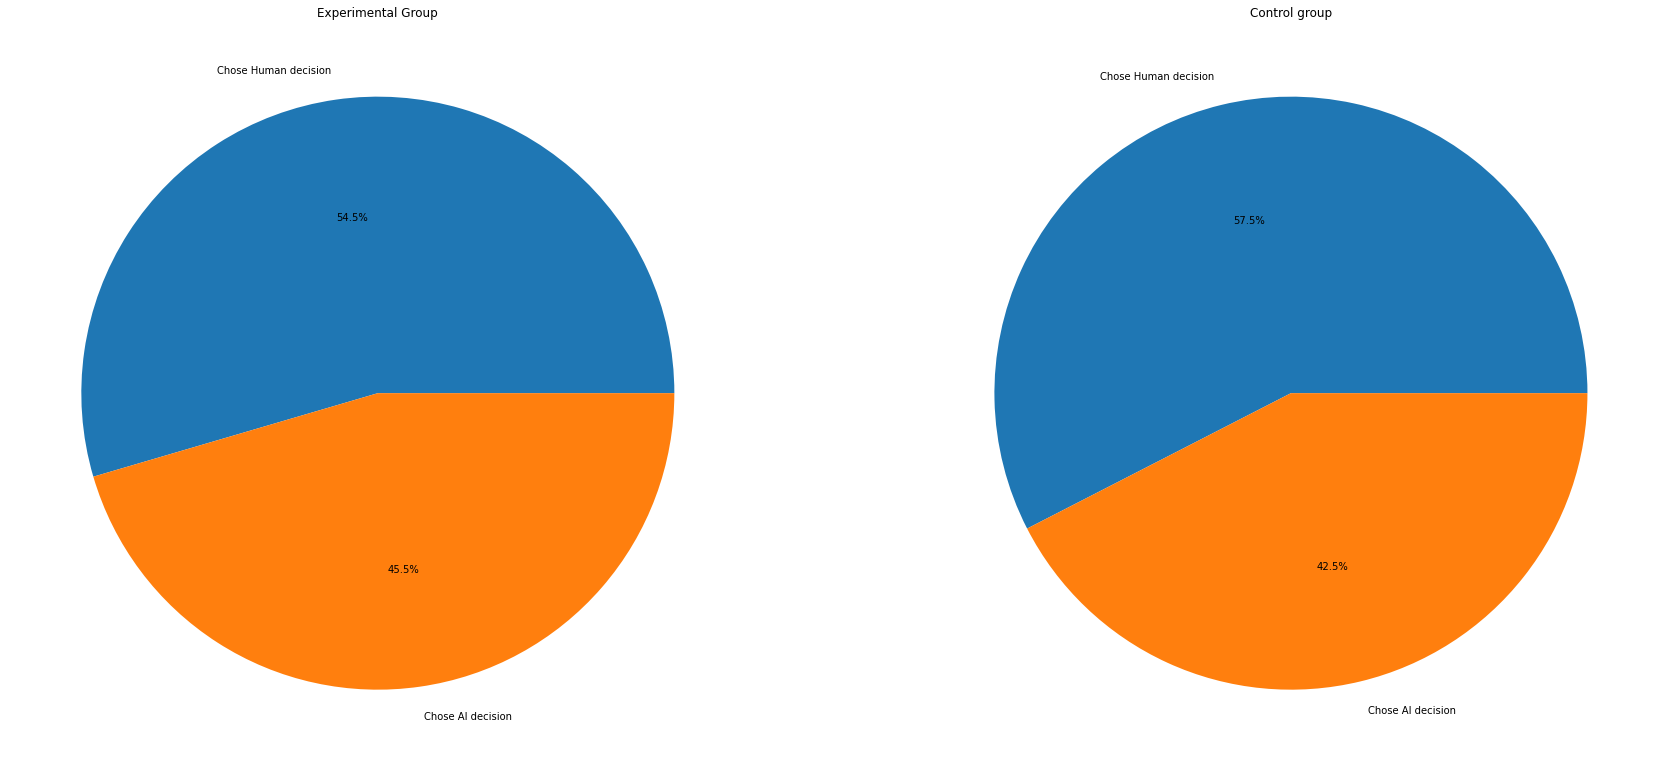

In [106]:
# AI Aversion

plt.figure(figsize=(10,10))
plt.subplot(221)
chose_human = len(agg_exp.loc[(agg_exp["OUTPUT:answer2"] != agg_exp["ai_dec"])])/len(agg_exp)
chose_AI = 1 - chose_human
plt.pie([chose_human, chose_AI], labels=["Chose Human decision", "Chose AI decision"], autopct='%1.1f%%')
plt.title("Experimental Group")

plt.subplot(222)
chose_human = len(agg_ctrl.loc[(agg_ctrl["OUTPUT:answer1"] != agg_ctrl["ai_dec"])])/len(agg_ctrl)
chose_AI = 1 - chose_human
plt.pie([chose_human, chose_AI], labels=["Chose Human decision", "Chose AI decision"], autopct='%1.1f%%')
plt.title("Control group")
plt.show()

plt.show()

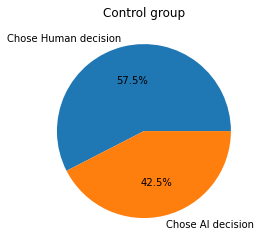